In [208]:
# import library
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import date library
from datetime import datetime
from operator import attrgetter

import warnings
warnings.filterwarnings('ignore')

In [209]:
# read data
df = pd.read_csv('kiva_loan.csv')
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly


In [210]:
# tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [342]:
#ubah tipe data
cat_cols = ['activity','sector','country','currency','repayment_interval','region']
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657698 entries, 0 to 671204
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  657698 non-null  int64              
 1   funded_amount       657698 non-null  float64            
 2   loan_amount         657698 non-null  float64            
 3   activity            657698 non-null  category           
 4   sector              657698 non-null  category           
 5   use                 653890 non-null  object             
 6   country             657698 non-null  category           
 7   region              614405 non-null  category           
 8   currency            657698 non-null  category           
 9   partner_id          657698 non-null  float64            
 10  posted_time         657698 non-null  datetime64[ns, UTC]
 11  funded_time         611522 non-null  datetime64[ns, UTC]
 12  term_in_months      6

In [212]:
#mencari missing value
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

- membiarkan missing value pada kolom use karena peminjam mungkin tidak ingin menjelaskan secara rinci tujuan meminjam
- membiarkan missing value pada kolom region karena peminjam mungkin tidak ingin menjelaskan secara rinci lokasinya hanya memasukan nama negara saja
- membiarkan missing value pada kolom funded time karena missing value diaakibatkan target peminjam belum terpenuhi

In [ ]:
# menghapus naa pada kolom partner id karena ingin melakukan investasi melalui partner agar lebih aman
df.dropna(subset= ['partner_id'], inplace = True)


In [344]:
df_terpenuhi = df[df['funded_amount'] == df['loan_amount']]
len(df)-len(df_terpenuhi)

46175

insight: Pembuktian bahwa missing value pada kolom funded time diaakibatkan target peminjam belum terpenuhi

In [231]:
#durasi terpenuhinya target 
df['posted_time'] = pd.to_datetime(df['posted_time'])
df['funded_time'] = pd.to_datetime(df['funded_time'])
df['jangka_waktu']= df['funded_time'] - df['posted_time']

In [ ]:

df["days_only"] = df["jangka_waktu"].dt.days

## Uji korelasi

<Axes: xlabel='lender_count', ylabel='loan_amount'>

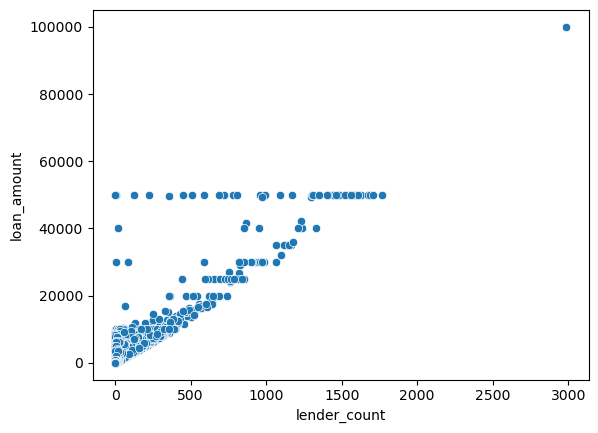

In [295]:
sns.scatterplot(data=df, y='loan_amount', x='lender_count', palette=['red', 'green', 'blue'])

In [331]:
df[['lender_count', 'loan_amount']].corr(method= 'spearman')

,lender_count,loan_amount
lender_count,1.000000,0.801387
loan_amount,0.801387,1.000000


insight: lender_count dan loan_amount berpengaruh kuat satu sama lain, karena semakin banyaknya dana yang dibutuhkan maka semaki banyak peminjam yang berkontribusi

## 1. Sektor dengan jumlah pinjaman terbesar

In [245]:
df.groupby(by = 'sector')[['loan_amount']].sum().sort_values(by = 'loan_amount', ascending= False).reset_index()

,sector,loan_amount
0,Agriculture,139727400.0
1,Food,114551750.0
2,Retail,93777550.0
3,Services,40238225.0
4,Clothing,35267325.0
5,Education,30197000.0
6,Housing,23528700.0
7,Personal Use,14955350.0
8,Arts,10969325.0
9,Transportation,10725575.0


insight: Sektor dengan jumlah pinjaman terbesar adalah sektor pertanian

## 2. Mencari sektor dengan lender_count (kreditur yang berkontribusi) terbanyak jika target pinjamn terpenuhi

In [247]:
sektor = df_terpenuhi.groupby(['sector'])[['lender_count']].sum().sort_values(by='lender_count', ascending=False).head(5).reset_index()
sektor

,sector,lender_count
0,Agriculture,3536638
1,Food,2483972
2,Retail,1960132
3,Services,943060
4,Education,882238


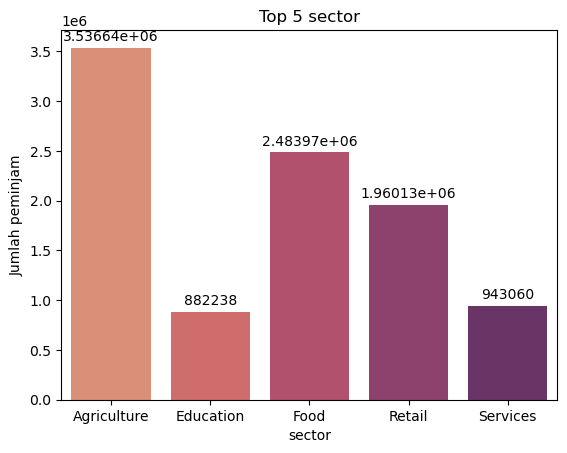

In [248]:
sektor['sector']=sektor['sector'].cat.remove_unused_categories()
fig = sns.barplot(data =sektor, x ='sector', y ='lender_count', palette= 'flare')
plt.title('Top 5 sector')
plt.ylabel('Jumlah peminjam')
for i in fig.containers:
    fig.bar_label(i, padding= 3)

insight: Sektor pertanian tetap menjadi sektor nomo 1 dengan kerditur terbanyak

### a. Mencari country terbaik dengan spesifikasi sektor pertanian, kondisi durasi pencairan pinjaman kurang dari rata rata, dan kondisi target peminjam terpenuhi dibawah rata rata hari.

In [ ]:
# mencari nilai mean term in
df_terpenuhi['term_in_months'].mean() 
# rata rata pengembalian dana 13 hari


13.757403854048516

In [334]:
# rata rata durasi terpenuhi
df_terpenuhi['days_only'].mean()

13.52210223017324

In [268]:
# kondisi 
data_new =df_terpenuhi[(df_terpenuhi['term_in_months']<= 13.5) & (df_terpenuhi['sector']=='Agriculture') & (df_terpenuhi["days_only"]<= 13.4)]
data4 = data_new.groupby(['country'])[['sector']].count().sort_values(by='sector', ascending= False).head(5).reset_index()
data4

,country,sector
0,Philippines,27384
1,Kenya,5871
2,Peru,3056
3,Uganda,1762
4,El Salvador,1659


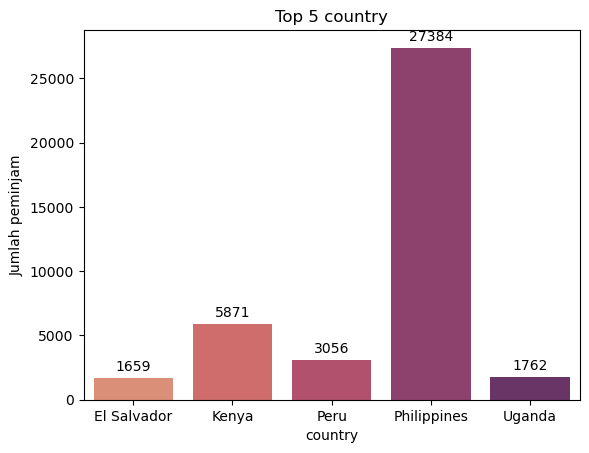

In [298]:
data4['country']=data4['country'].cat.remove_unused_categories()
plt.Figure(figsize=(30,30))
fig = sns.barplot(data = data4, x = 'country', y  = 'sector', palette= 'flare')
for i in fig.containers:
    fig.bar_label(i, padding= 3)
    plt.title('Top 5 country')
    plt.ylabel('Jumlah peminjam')

insight: Filipina merupakan negara dengan country terbaik dengan spesifikasi sektor pertanian, kondisi durasi pencairan pinjaman kurang dari rata rata, dan kondisi target peminjam terpenuhi dibawah rata rata hari.

### b. Mencari activity terbesar jika spesifikasi sektor pertanian, kondisi durasi pencairan pinjaman kurang dari rata rata, kondisi target peminjam terpenuhi dibawah rata rata hari, dan country Philippines .

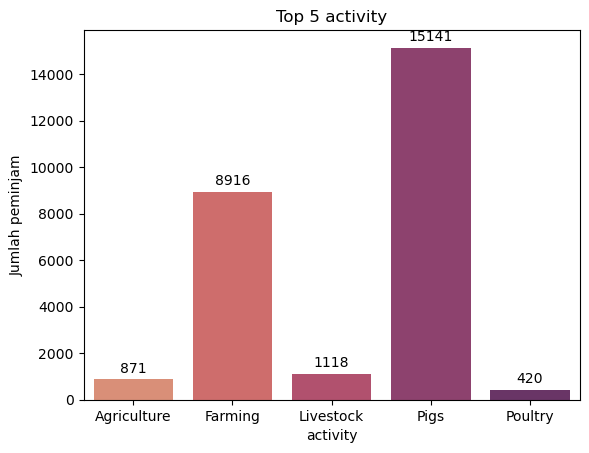

In [304]:
# Banyaknya activity yang dilakukan 
data2_new =df_terpenuhi[(df_terpenuhi['term_in_months']<= 13.5) & (df_terpenuhi['sector']=='Agriculture') & (df_terpenuhi["days_only"]<= 13.4)& (df_terpenuhi['country']=='Philippines')]
data2 = data2_new.groupby(by = 'activity')[['id']].count().sort_values(by = 'id', ascending= False).head(5).reset_index()
data2
data2['activity']=data2['activity'].cat.remove_unused_categories()
plt.Figure(figsize=(30,30))
fig = sns.barplot(data = data2, x = 'activity', y  = 'id', palette= 'flare')
for i in fig.containers:
    fig.bar_label(i, padding= 3)
    plt.title('Top 5 activity')
    plt.ylabel('Jumlah peminjam')

insight:
aktivitas terbesar dari kondisi diatas adalah pigs, bila diurutkan top 5 ada pigs,farming, livestock,agriculture, dan poultry

 ### c. Mencari region terbesar jika spesifikasi sektor pertanian, kondisi durasi pencairan pinjaman kurang dari rata rata, dan kondisi target peminjam terpenuhi dibawah rata rata hari, activity pigs, dan country Philippines.

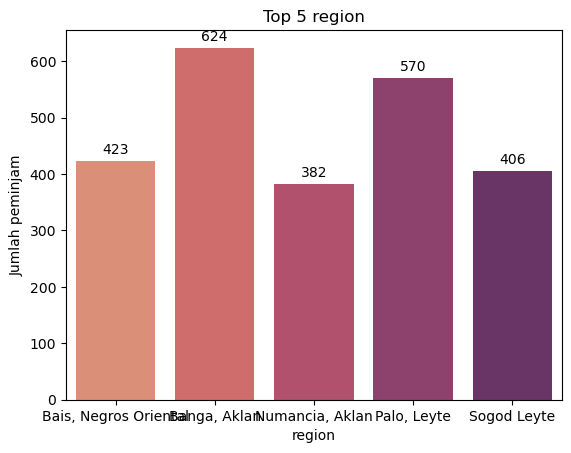

In [350]:

data3 =df_terpenuhi[(df_terpenuhi['term_in_months']<= 13.5) & (df_terpenuhi['sector']=='Agriculture') & (df_terpenuhi["days_only"]<= 13.4) & (df_terpenuhi['country']=='Philippines') & (df_terpenuhi['activity']=='Pigs')]
data3
data3new = data3.groupby(by = 'region')[['id']].count().sort_values(by = 'id', ascending= False).head(5).reset_index()
data3new
data3new['region']=data3new['region'].cat.remove_unused_categories()
plt.Figure(figsize=(40,100))
fig = sns.barplot(data = data3new, x = 'region', y  = 'id', palette= 'flare')
for i in fig.containers:
    fig.bar_label(i, padding= 3)
    plt.title('Top 5 region')
    plt.ylabel('Jumlah peminjam')


In [351]:
data3new

,region,id
0,"Banga, Aklan",624
1,"Palo, Leyte",570
2,"Bais, Negros Oriental",423
3,Sogod Leyte,406
4,"Numancia, Aklan",382


insight: region dengan peminjam terbanyakjika spesifikasi sektor pertanian, kondisi durasi pencairan pinjaman kurang dari rata rata, dan kondisi target peminjam terpenuhi dibawah rata rata hari, activity pigs, dan country Philippines adalah Banga,aklan Filipina

## 3. Banyaknya jumlah pinjaman yang biasa dipinjam

In [275]:
banyak = df[['loan_amount']].value_counts().head(10)
banyak

loan_amount
225.0          32686
300.0          30308
500.0          28862
200.0          26172
250.0          24250
400.0          24108
350.0          21440
125.0          19973
325.0          19764
275.0          19097
Name: count, dtype: int64

Text(0, 0.5, 'Jumlah peminjam')

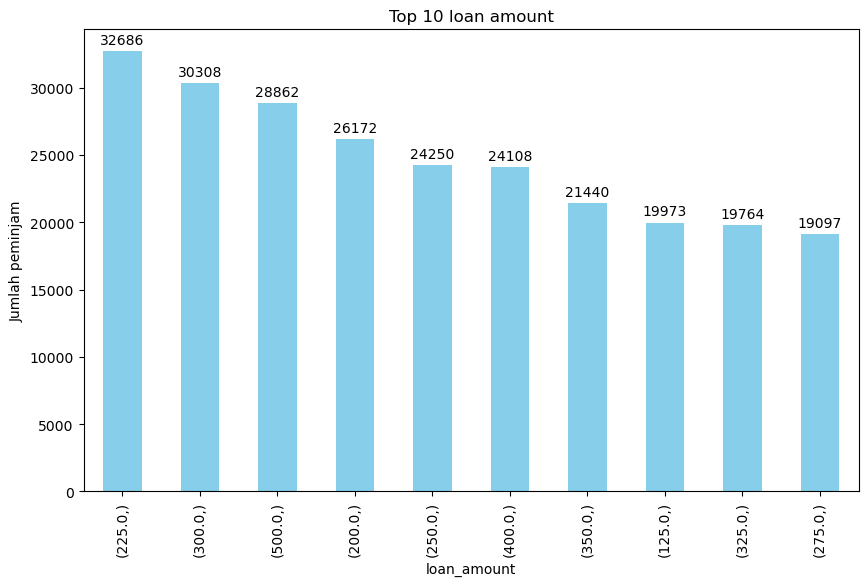

In [277]:
fig = banyak.plot(kind='bar', figsize=(10, 6), color='skyblue')
for i in fig.containers:
    fig.bar_label(i, padding= 3)
plt.title('Top 10 loan amount')
plt.ylabel('Jumlah peminjam')

insight: Para peminjam umumnya meminjam sebesar 125 - 500 dolar

##  4. Rentang waktu target pinjaman terpenuhi

Text(0, 0.5, 'Jumlah peminjam')

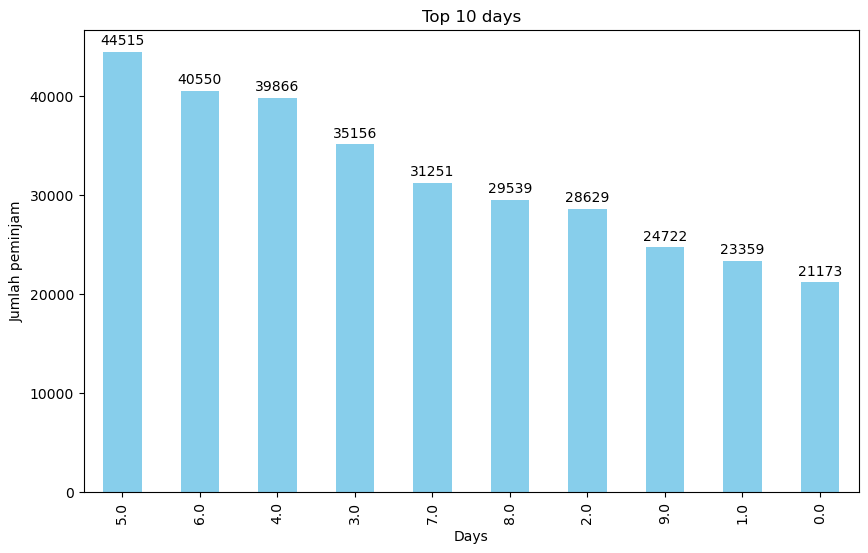

In [279]:

waktu2 = df['days_only'].value_counts().head(10)
fig = waktu2.plot(kind='bar', figsize=(10, 6), color='skyblue')
for i in fig.containers:
    fig.bar_label(i, padding= 3)
plt.title('Top 10 days')
plt.xlabel('Days')
plt.ylabel('Jumlah peminjam')

insight: Rentang waktu target tercapai umumnya 1 hingga 7 hari

##  5. Perbandingan macam macam repayment interval

Text(0, 0.5, 'Jumlah peminjam')

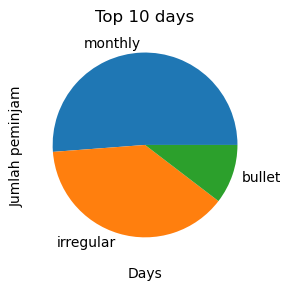

In [324]:
fig = df['repayment_interval'].value_counts().plot(kind="pie",figsize=(3,3))
for i in fig.containers:
    fig.pie(i)
plt.title('Top 10 days')
plt.xlabel('Days')
plt.ylabel('Jumlah peminjam')



insight: Repayment interval yang paling umum digunakan adalah monthly

## 6. Partner _id yang kompeten

Text(0, 0.5, 'Jumlah memberikan pinjaman')

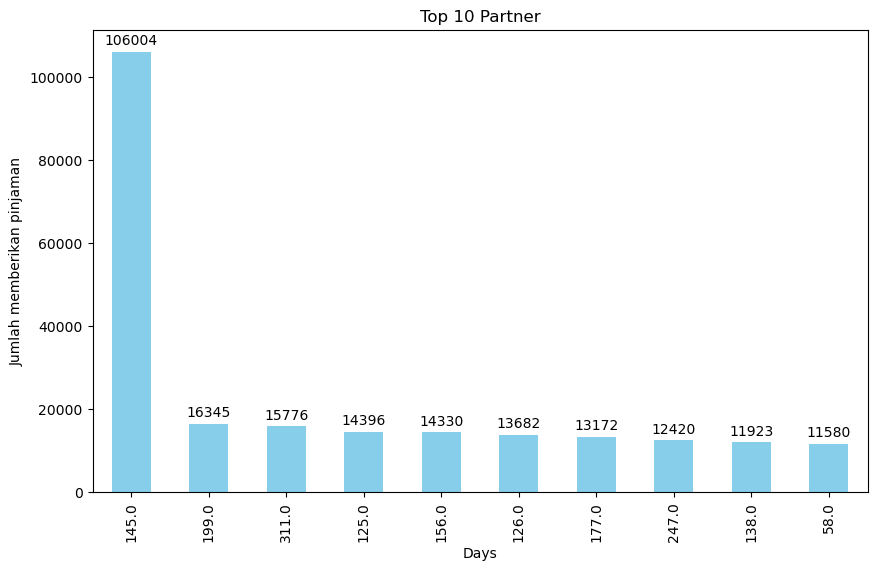

In [354]:
idpartner = df_terpenuhi['partner_id'].value_counts().head(10)
fig = idpartner.plot(kind='bar', figsize=(10, 6), color='skyblue')
for i in fig.containers:
    fig.bar_label(i, padding= 3)
plt.title('Top 10 Partner')
plt.xlabel('Days')
plt.ylabel('Jumlah memberikan pinjaman')

insight: Partner id 145, sudah sangat sering menjadi partner di Kiva, tidak hanya di sektor pertanian saja. 
Partner id yang kompeten menjadi daya tarik sendiri bagi para investor. 

## 7. Durasi Pinjaman

Text(0, 0.5, 'Jumlah peminjam')

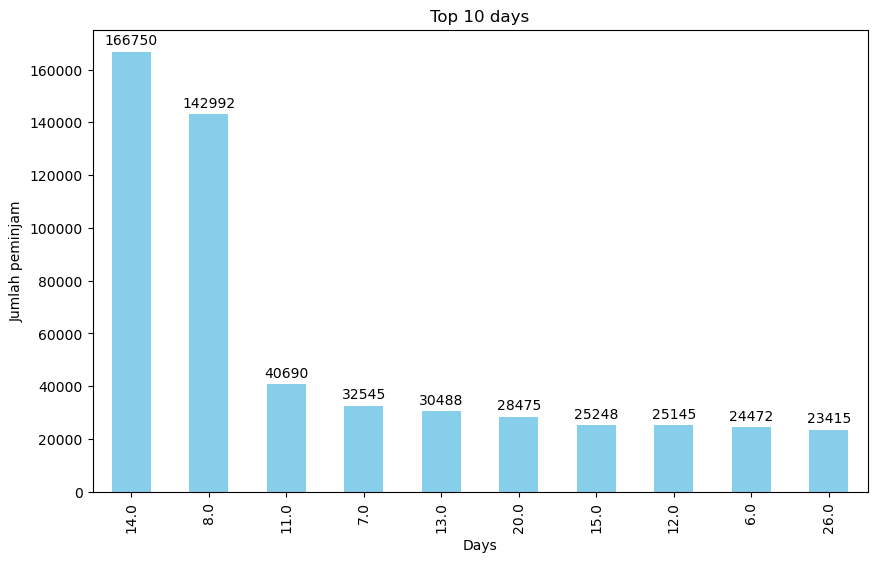

In [311]:
balik = df['term_in_months'].value_counts().head(10)
fig = balik.plot(kind='bar', figsize=(10, 6), color='skyblue')
for i in fig.containers:
    fig.bar_label(i, padding= 3)
plt.title('Top 10 days')
plt.xlabel('Days')
plt.ylabel('Jumlah peminjam')

insight: durasi peminjam untuk membayar pinjamannya paling umum adaah 14 hari

In [314]:
dataakhir =df[(df['term_in_months']<= 13.5) & (df['sector']=='Agriculture') & (df["days_only"]<= 13.4) & (df['country']=='Philippines') & (df['activity']=='Pigs')& (df['partner_id']== 145.0)]
dataakhir

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,jangka_waktu,days_only
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2014-01-02 07:47:28+00:00,8.0,7,irregular,0 days 03:28:58,0.0
72,653134,575.0,575.0,Pigs,Agriculture,to purchase additional feed for her pigs.,Philippines,"Brookes Point, Palawan",PHP,145.0,2014-01-02 02:58:01+00:00,2014-01-02 14:47:08+00:00,8.0,20,irregular,0 days 11:49:07,0.0
118,653146,175.0,175.0,Pigs,Agriculture,to purchase feed and vaccines for her pigs,Philippines,"Santander, Cebu",PHP,145.0,2014-01-02 03:55:32+00:00,2014-01-02 07:23:03+00:00,7.0,7,irregular,0 days 03:27:31,0.0
147,653139,200.0,200.0,Pigs,Agriculture,"to buy feeds, vaccines, and other supplies for...",Philippines,"Santander, Cebu",PHP,145.0,2014-01-02 03:27:08+00:00,2014-01-02 06:21:58+00:00,7.0,7,irregular,0 days 02:54:50,0.0
176,653330,200.0,200.0,Pigs,Agriculture,to buy food and vitamins for her pigs.,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 13:19:17+00:00,2014-01-02 20:42:40+00:00,8.0,6,irregular,0 days 07:23:23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666526,1329209,100.0,100.0,Pigs,Agriculture,"to buy feed, vitamins, and other supplies to r...",Philippines,"Catarman, Northern Samar",PHP,145.0,2017-06-29 05:38:34+00:00,2017-07-07 21:31:09+00:00,8.0,1,irregular,8 days 15:52:35,8.0
666530,1329185,300.0,300.0,Pigs,Agriculture,to buy feeds and other supplies to raise her pigs,Philippines,"Bindoy, Negros Oriental",PHP,145.0,2017-06-29 05:18:46+00:00,2017-07-11 15:26:35+00:00,11.0,6,irregular,12 days 10:07:49,12.0
666545,1329126,275.0,275.0,Pigs,Agriculture,"to buy feeds, vitamins, and other supplies to ...",Philippines,"Catbalogan, Samar",PHP,145.0,2017-06-29 03:59:00+00:00,2017-07-07 19:11:07+00:00,7.0,1,irregular,8 days 15:12:07,8.0
666611,1328973,400.0,400.0,Pigs,Agriculture,to buy feed and vitamins for her pigs.,Philippines,"Bais, Negros Oriental",PHP,145.0,2017-06-29 01:45:13+00:00,2017-07-07 14:11:29+00:00,8.0,1,irregular,8 days 12:26:16,8.0


insight: Menurut hasil analisis dari beberapa faktor 
- lebih baik jika berinvestasi ketika target terpenuhi
- lebih baik di sector pertanian karena merupakan sector terbaik bila dilihat dari banyaknya jumlah pinjaman yang berhasil dicairkan 
- lebih baik investasi di filipina karena Filipina merupakan negara dengan country terbaik dengan spesifikasi sektor pertanian, kondisi durasi pencairan pinjaman kurang dari rata rata, dan kondisi target peminjam terpenuhi dibawah rata rata hari.
- lebih baik jika partner_id = 145.0 karena kompeten dan sering menjadi partner bidang pertanian
- lebih baik memiliki jangka waktu target terpenuhi 0-7 hari